<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Proaño Rhon, Leonardo Francisco**

**22-02-2022**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [12]:
#%pip install -r requirements.txt
%reload_ext autoreload
%autoreload 2
import importlib
import miningscience
importlib.reload(miningscience)
# Escriba aquí su código para el ejercicio 1
import miningscience as msc

print("Descripción de l funcion download_pubmed:")
help(msc.download_pubmed)

print("Descripción de la funcion mining_pubs:")
help(msc.mining_pubs)

Descripción de l funcion download_pubmed:
Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    Función que permite descargar los ids de PubMed utilizando ENTREZ de Biopython.
    El parámtero es la keyword es el término de búsqueda.

Descripción de la funcion mining_pubs:
Help on function mining_pubs in module miningscience:

mining_pubs(tipo: str) -> pandas.core.frame.DataFrame
    Según el parámetro tipo, se descargan los ids de PubMed de la búsqueda:
        Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un dataframe con el PMID y el DP_year.
        Si el tipo es "AU" recupera el número de autores por PMID. El retorno es un dataframe con el PMID y el num_auth.
        Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un dataframe con el country y el num_auth.




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [13]:
# Ahora escribimos el código para llamar a download_pubmed para descargar la data de Ecuador genomics
records = msc.download_pubmed("Ecuador genomics")
records_count = records["Count"]
first_element_id = records["IdList"][0]
print(f"El número de artículos es: {records_count}") # xx corresponde al número de artículos recuperados

print(f"El PMID del primer artículo es: {first_element_id}") # xxxxxxxx corresponde al ID del artículo en PUDMED

El número de artículos es: 193
El PMID del primer artículo es: 35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [15]:
# Para el ejercicio 3 se utilizó la función mining_pubs para crear dataframes de pub_year, pub_authors y countries
print("Dataframe de articulos con año:")
df_pub_year = msc.mining_pubs("DP")
print(df_pub_year.head(2))
print(df_pub_year.tail(2))
print('-------------------------------------------')


print("\nDataframe de articulos con autores:")
df_pub_authors = msc.mining_pubs("AU")
print(df_pub_authors.head(2))
print(df_pub_authors.tail(2))
print('-------------------------------------------')


print("\nDataframe de número de articulos por pais:")
df_countries = msc.mining_pubs("AD")
print(df_countries.head(2))
print(df_countries.tail(2))

Dataframe de articulos con año:
       PMID     DP_year
0  35121084  2022 Feb 2
1  35120121    2022 Feb
         PMID     DP_year
191  17187350    2007 Jan
192   8661097  1996 Jul 1
-------------------------------------------

Dataframe de articulos con autores:
       PMID  num_auth
0  35121084        12
1  35120121        14
         PMID  num_auth
189  19177531         7
190  19018989         1
-------------------------------------------

Dataframe de número de articulos por pais:
         country  num_auth
0  United States        12
1  United States        14
           country  num_auth
190        England         1
191  United States         9


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


Desviacion Estandar
13.045912514398267
Media
12.0625


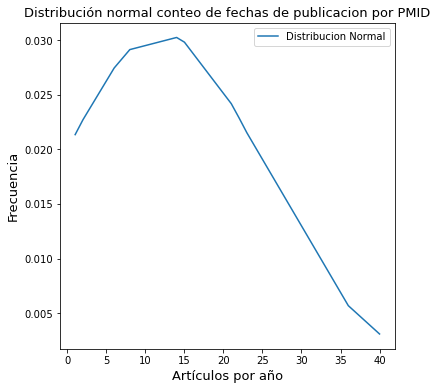

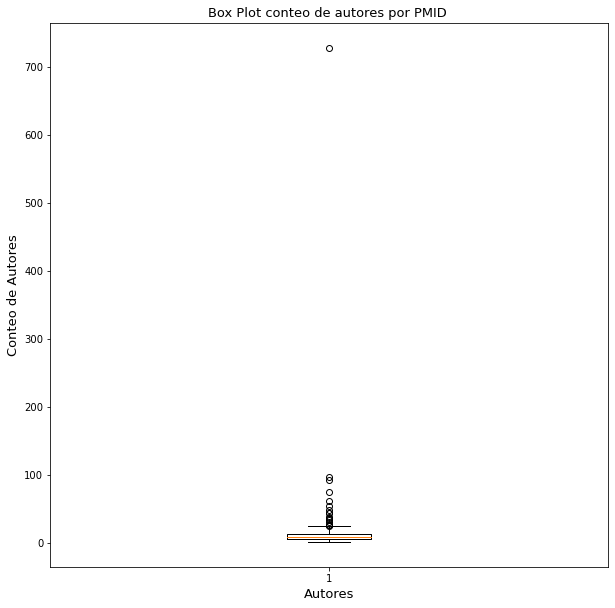

PMID        35121084
num_auth         728
dtype: object


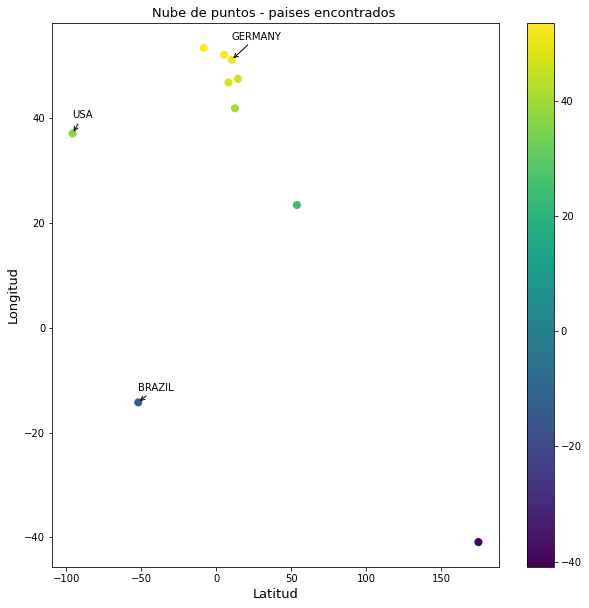

In [21]:
# En el ejercicio 4 se presenta el siguiente código
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import statistics 

df_pub_year['conteo'] = pd.to_datetime(df_pub_year['DP_year'], infer_datetime_format=True)
data = df_pub_year['conteo'].dt.strftime('%Y')
data = pd.DataFrame(data, columns = ['conteo'])
data = pd.DataFrame(data["conteo"].value_counts())
df = pd.DataFrame(data.rename_axis(columns="DP_year"))
#print(df)
#desviación estandar 
sd = df.conteo.std()
print('Desviacion Estandar' )
print(sd)
#media
print('Media')
mean = df['conteo'].mean()
print(mean)
#datos
x_axis=list(df['conteo'])

#figura 1
fig, ax = plt.subplots()
x_axis=list(df['conteo'])
plt.title("Distribución normal conteo de fechas de publicacion por PMID",fontsize=13)
line1, = ax.plot(x_axis, norm.pdf(x_axis, mean, sd), label='Distribucion Normal')
plt.xlabel("Artículos por año",fontsize=13)
plt.ylabel("Frecuencia",fontsize=13)
ax.legend(handles=[line1])
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( 6, 6)

#figura 2
d_cont=list(df_pub_authors['num_auth'])
fig = plt.figure(figsize =(10, 10)) 
plt.title("Box Plot conteo de autores por PMID ",fontsize=13)
plt.xlabel("Autores",fontsize=13)
plt.ylabel("Conteo de Autores",fontsize=13)
plt.boxplot(d_cont)
plt.show()

autores= pd.DataFrame(data=df_pub_authors)
print(autores.max())


#figura 3
flat_list = df_countries['country'].tolist()
resultantList = [] 
for element in flat_list:
    if element not in resultantList:
        resultantList.append(element)

unique_zipcodes = list(set(resultantList))
unique_zipcodes.sort()

import pandas as pd
data = pd.read_csv('./data/countries.csv', engine='python', skipfooter=3)
data_name = data[data.name.isin(resultantList)]
import matplotlib.pyplot as plt
plt.scatter(data_name.longitude, data_name.latitude, s=50, c=data_name.latitude)
plt.colorbar()

ard = dict(arrowstyle="->")
plt.annotate('GERMANY', xy = (10.451526, 51.165691), 
               xytext = (10.451526, 55), arrowprops = ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -12), arrowprops= ard)
plt.annotate('USA', xy = (-95.712891 , 37.09024), 
               xytext = (-95.712891, 40), arrowprops= ard)

plt.title("Nube de puntos - paises encontrados ",fontsize=13)
plt.xlabel("Latitud",fontsize=13)
plt.ylabel("Longitud",fontsize=13)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( 10, 10 )

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

En los resultados del ejercicio 4

## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [5]:
# Escriba aquí su código para el ejercicio 6

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```